In [1]:
import numpy as np
from qiskit.quantum_info import basis_state, state_fidelity

In [2]:
def random_unitary_matrix(d, seed=None):
    unitary = np.zeros([d,d], dtype=complex)
    for j in range(d):
        if j == 0:
            a = random_state(d, seed)
        else:
            a = random_state(d)
        unitary[:,j] = np.copy(a)
        # Grahm-Schmidt Orthogonalize
        i = j-1
        while i >= 0:
            dc = np.vdot(unitary[:,i],a)
            unitary[:,j] = unitary[:,j]-dc*unitary[:,i]
            i = i - 1
        # normalize
        unitary[:,j] = unitary[:,j] / np.sqrt(np.vdot(unitary[:,j],unitary[:,j]));
    return unitary

In [3]:
def random_state(dim, seed=None):
    """
    Return a random quantum state from the uniform (Haar) measure on
    state space.

    Args:
        dim (int): the dim of the state spaxe
        seed (int): Optional. To set a random seed.

    Returns:
        ndarray:  state(2**num) a random quantum state.
    """
    if seed is not None:
        np.random.seed(seed)
    # Random array over interval (0, 1]
    x = np.random.random(dim)
    x += x == 0
    x = -np.log(x)
    sumx = sum(x)
    phases = np.random.random(dim)*2.0*np.pi
    return np.sqrt(x/sumx)*np.exp(1j*phases)

In [4]:
from scipy.stats import unitary_group

In [5]:
u2 = unitary_group.rvs(2)
np.dot(u2.transpose().conj(),u2)

array([[1.00000000e+00+0.00000000e+00j, 6.24500451e-17+2.77555756e-17j],
       [6.24500451e-17-2.77555756e-17j, 1.00000000e+00+0.00000000e+00j]])

In [6]:
import time

d = 8
number = 100000
E_P0_last = 0
E_P02_last = 0
E_P0_save=[]
E_P02_save=[]
state = random_state(d)

start = time.time()
for ii in range(number):
    
    u = random_unitary_matrix(d)
    E_P0 = (E_P0_last*ii)/(ii+1)+state_fidelity(state, u[:,0])/(ii+1)
    E_P0_last = E_P0
    E_P0_save.append(E_P0)

end = time.time()

print(end - start)
start = time.time()

for ii in range(number):
    u2 = unitary_group.rvs(d)
    E_P02 = (E_P02_last*ii)/(ii+1)+state_fidelity(state, u2[:,0])/(ii+1)
    E_P02_last = E_P02
    E_P02_save.append(E_P02)
end = time.time()

print(end - start)

44.34613919258118
13.115227222442627


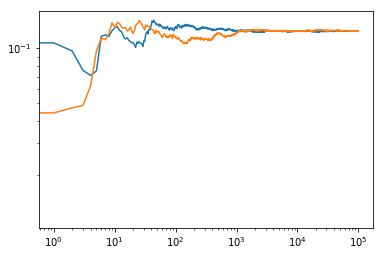

In [9]:
import matplotlib.pyplot as plt

plt.loglog(E_P0_save)
plt.loglog(E_P02_save)
plt.show()